       STATE           LGA     AREA  PERIMETER LONGITUDE LATITUDE FULL_NAME  \
591  Anambra     Dunukofia   58.595     48.573      None     None      None   
540     Ondo         Irele  815.163    139.109      None     None      None   
416      Oyo  Ibarapa East  822.403    141.334      None     None      None   
412    Ekiti    Ekiti East  220.248     71.896      None     None      None   
519     Ogun      Odogbolu  544.263    103.056      None     None      None   

                                                coords  
591  [(6.980170726776123, 6.250352382659912), (6.97...  
540  [(5.096798419952393, 6.718241214752197), (5.09...  
416  [(3.6834182739257812, 7.7384161949157715), (3....  
412  [(5.785360336303711, 7.765903949737549), (5.79...  
519  [(3.7435598373413086, 6.924374103546143), (3.7...  


Shape #617: POLYGON

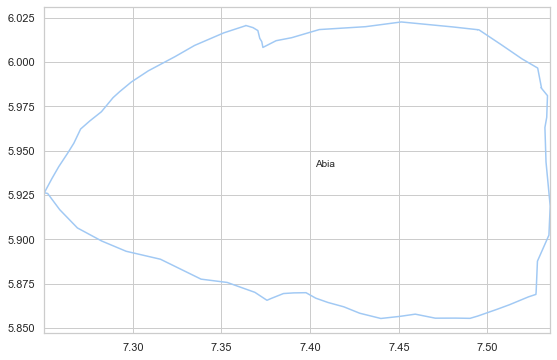

In [1]:
import sys
sys.path.append('/home/momo/anaconda3/lib/python3.8/site-packages')
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

#opening the vector map
shp_path = "new_lga_nigeria_2003.shp"
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

len(sf.shapes())

sf.records()

def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)
df.shape

print(df.sample(5))

def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

STATE = 'Abia'
##to get the id of the city map to be plotted
com_id = df[df.STATE == 'Abia'].index.values[0]
plot_shape(com_id, STATE)
sf.shape(com_id)


Shape #201: POLYGON

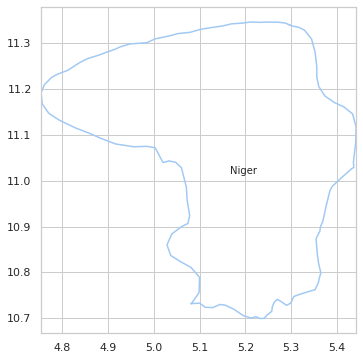

In [2]:
STATE = 'Niger'
##to get the id of the city map to be plotted
com_id = df[df.STATE == 'Niger'].index.values[0]
plot_shape(com_id, STATE)
sf.shape(com_id)

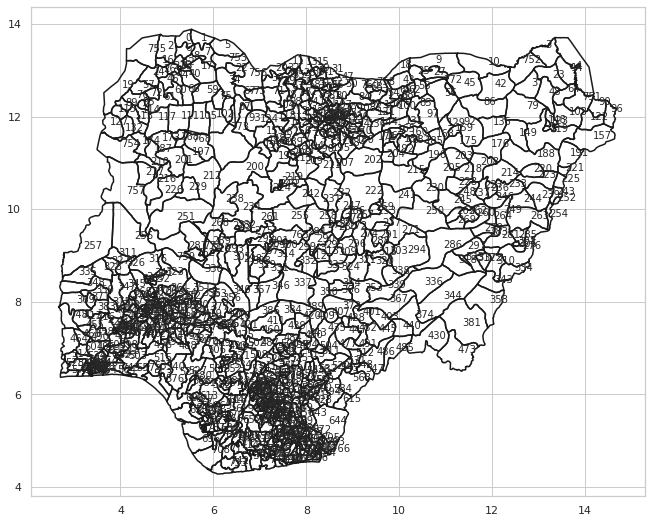

In [3]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#calling the function and passing required parameters to plot the full map
plot_map(sf)